<a href="https://colab.research.google.com/github/Zrmikstri/CS115-YOLOv3/blob/main/YOLOonCustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HUẤN LUYỆN MÔ HÌNH YOLOV3 TRÊN MỘT BỘ DATASET TÙY CHỈNH

# Step 1: Sao chép và xây dựng darknet

In [ ]:
# Clone darknet repository
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# Change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# Verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# Make darknet (build)
!make

# Step 1: Thu thập và gán nhãn dữ liệu
* Sử dụng Google's Open Images Dataset

Link: https://storage.googleapis.com/openimages/web/index.html

* Điều chỉnh lại nhãn dữ liệu lấy từ Google's Open Images Dataset sao cho phù hợp với YOLOv3, tham khảo link github: 
https://github.com/theAIGuysCode/OIDv4_ToolKit

# Step 2: Tùy chỉnh setting  file để huấn luyện

1.   Tạo file yolov3_custom.cfg với nội dung giống như file yolov3.cfg, sau đó:
    *   Thay đổi dòng batch thành batch=64
    *  Thay đổi dòng subdivisions thành subdivisions=64

    ![](https://i.imgur.com/tNmOckD.png)
    *   thay đổi dòng max_batches thành max_batches = number of classes * 2000
    *   Thay đổi dòng steps thành  steps=80% của  max_batches, 90% của max_batches
    
    ![](https://i.imgur.com/xprdFTB.png)

    *   Chỉnh classes=5 (đây là số class trong custom dataset)
    *   Thay [filters=255] thành filters = (classes + 5)* 3 tại dòng 603, dòng 689 và dòng 776

    ![](https://i.imgur.com/BnwJqZI.png)
2.   Tạo file obj.names, obj.data trong đường dẫn darknet\data

    ![](https://i.imgur.com/uNPoehG.png)

    ![](https://i.imgur.com/7h1C1xU.png)






4. Tạo một  file train.txt trong đường dẫn darknet\data chứa tất cả đường dẫn đến ảnh, mỗi đường dẫn một dòng
    ![](https://i.imgur.com/mMMQSlU.png)


5. Tất cả ảnh dùng để huấn luyện sẽ được đặt trên đường dẫn darknet\data\obj

In [ ]:
# Create train.txt
import os
image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

# Step 3: Tải về pretrained weights cho lớp convolutional và đặt trong đường dẫn darknet\

In [ ]:
# Getting pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

# Step 4: Thực hiện huấn luyện



# Bắt đầu huấn luyện lần đầu tiên
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```



In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show


## Tiếp tục huấn luyện nếu có dừng giữa chừng trong quá trình huấn luyện
```
!./darknet detector train <path to obj.data> <path to custom config> <path to last weights> 
```



In [ ]:
# Continue trainning
## Go to directory darknet
import os
os.chdir('/content/drive/MyDrive/Báo cáo cuối kì/YOLO on custom dataset/darknet')
!chmod +x ./darknet

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights -map -dont_show

# Step 5: Thực hiện kiểm tra mô hình trên dữ liệu mới
Sau khi hoàn thành quá trình huấn luyện, chuyển setting của fie yolov3_custom.cfg để kiểm tra mô hình
![](https://i.imgur.com/6eyzsqG.png)


In [ ]:
# Testing
import os
os.chdir('/content/drive/MyDrive/Báo cáo cuối kì/YOLO on custom dataset/darknet')
!chmod +x ./darknet

In [ ]:
# define functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3 * width, 3 * height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_final.weights data/Test_image/image6.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

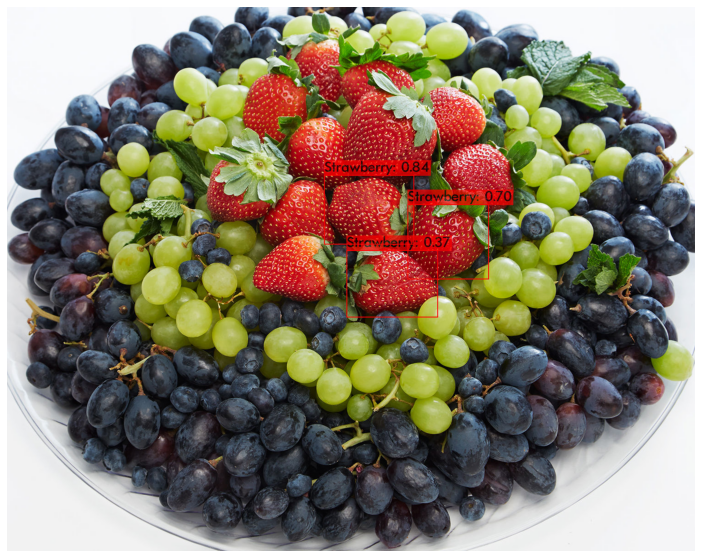

In [ ]:
imShow('/content/drive/MyDrive/Báo cáo cuối kì/YOLO on custom dataset/darknet/predictions.jpg')